## Install necessary libraries

In [1]:
!pip install install pytorch>=1.6 cudatoolkit=11.0 -c pytorch
!pip install simpletransformers
!pip install wandb


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 117.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 114.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.9 MB/s

# Import Dependencies

In [2]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from simpletransformers.t5 import T5Model
import sklearn
import wandb

# Set Wandb api key

In [3]:
%env WANDB_API_KEY={"8fed25a36c785fb869426ffff16b98259a4ecec3"}

env: WANDB_API_KEY=8fed25a36c785fb869426ffff16b98259a4ecec3


# Read data

In [4]:
def get_data(train_data, eval_data):
  train_df = pd.read_csv(train_data).astype(str)
  eval_df = pd.read_csv(eval_data).astype(str)
  # train_df.rename(columns = {'category_train':'prefix'}, inplace = True)
  # eval_df.rename(columns = {'category_val':'prefix'}, inplace = True)
  return train_df, eval_df


In [5]:
train_df, eval_df = get_data("/content/singletask_noupsampling_train.csv", "/content/singlatask_noupsampling_val.csv")

# Model Training

This function takes input as Dataframe(train and validation data) that must be in required format and your wandb project name

In [6]:
def train_model(train_df, eval_df, wandb_name):
  model_args = {
      "output_dir" : "/content/",
      "max_seq_length": 400,
      "train_batch_size": 2,
      "eval_batch_size": 2,
      "num_train_epochs": 5,
      "evaluate_during_training": True,
      "evaluate_during_training_steps": 15000,
      "evaluate_during_training_verbose": True,
      "use_multiprocessing": False,
      "fp16": True,
      "save_steps": 30,
      "save_eval_checkpoints": False,
      "save_model_every_epoch": False,
      "reprocess_input_data": True,
      "overwrite_output_dir": True,
      "wandb_project": wandb_name,

  }
  model = T5Model('t5', 't5-base', use_cuda=True, cuda_device=0, args=model_args)
  model.train_model(train_df, eval_data=eval_df)
  return model

In [7]:
model1 = train_model(train_df, eval_df, "T5 - Single Task")

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the

  0%|          | 0/192 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

wandb: Currently logged in as: huzaifa-ali. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 5:   0%|          | 0/96 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Epoch 1 of 5:   0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Epoch 2 of 5:   0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Epoch 3 of 5:   0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Epoch 4 of 5:   0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [8]:
wandb.finish()

Training loss,▁▆▆▁█▁▄▃▁
eval_loss,█▆▁▃▄
global_step,▁▂▂▃▃▃▄▅▅▆▆▇██
lr,▁▁▁▁▁▁▁▁▁
train_loss,▁█▁▁▃
Training loss,0.00862
eval_loss,0.5591
global_step,480
lr,0.001
train_loss,0.20023


In [9]:
training_progress_scores_model1 = pd.read_csv("/content/training_progress_scores.csv")
training_progress_scores_model1.tail()

,global_step,eval_loss,train_loss
0,96,0.681402,0.006987
1,192,0.601528,0.560928
2,288,0.444380,0.000430
3,384,0.521247,0.000558
4,480,0.559101,0.200235


# Model performance

This function takes validataion data as input and returns classification reports and confusion matrix

In [10]:
def get_model_performance(eval_data):
  model_args_performance = {
      "overwrite_output_dir": True,
      "max_seq_length": 400,
      "eval_batch_size": 4,
      "use_multiprocessing": False,
      "num_beams": 5,
      "do_sample": True,
      "max_length": 10,
      "top_k": 50,
      "top_p": 0.95,
      "num_return_sequences": 2,
  }
  model = T5Model("t5", "/content/outputs/best_model", args=model_args_performance)
  # Load the evaluation data
  eval_df = pd.read_csv(eval_data).astype(str)
  eval_df.rename(columns = {'category_val':'prefix'}, inplace = True)
  # Prepare the data for testing
  to_predict = [
      prefix + ": " + str(input_text)
      for prefix, input_text in zip(eval_df["prefix"].tolist(), eval_df["input_text"].tolist())
  ]
  truth = eval_df["target_text"].tolist()
  tasks = eval_df["prefix"].tolist()

  # Get the model predictions
  preds = model.predict(to_predict)
  prediction_labels = []
  for pred in preds:
    pred = pred[0].strip()
    prediction_labels.append(pred)

  val_labels = eval_df["target_text"]
  result = model.eval_model(eval_df, f1 = sklearn.metrics.f1_score, acc = sklearn.metrics.accuracy_score)
  CR = classification_report(val_labels, prediction_labels)
  cm = confusion_matrix(val_labels, prediction_labels)
  print(CR)
  return sns.heatmap(cm, annot=True, cmap='Blues')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Generating outputs:   0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3982: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


Decoding outputs:   0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

       Question       0.77      1.00      0.87        37
         Review       0.00      0.00      0.00         3
Stylus problems       0.00      0.00      0.00         1
      Templates       1.00      0.12      0.22         8

       accuracy                           0.78        49
      macro avg       0.44      0.28      0.27        49
   weighted avg       0.75      0.78      0.69        49



<Axes: >

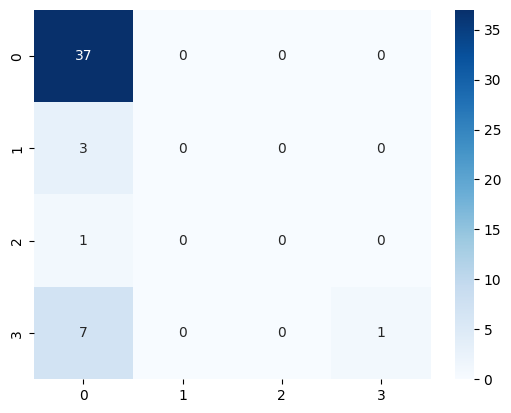

In [11]:
get_model_performance("/content/singlatask_noupsampling_val.csv")

# Model training and Evaluation for upsampled data

In [12]:
train_data_upsampled, evaluation_data = get_data("/content/singletask_train.csv", "/content/singlatask_noupsampling_val.csv")

In [13]:
model2 = train_model(train_data_upsampled, evaluation_data, "T5 - Single Task")

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


  0%|          | 0/308 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/154 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Epoch 1 of 5:   0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Epoch 2 of 5:   0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Epoch 3 of 5:   0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Running Epoch 4 of 5:   0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [14]:
wandb.finish()

Training loss,█▅▁▅█▃▄▃▁▁▅▁▅▄▁
eval_loss,▁█▂▄▅
global_step,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▁▂█▄▆
Training loss,0.05029
eval_loss,0.64356
global_step,770
lr,0.001
train_loss,0.37403


In [ ]:
# get_model_performance(evaluation_data)